# LIBS

In [1]:
# LIBS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Prepare of Data

In [2]:
# Function of prepare of dataset
def organizad_dataset(dataset):
    data = pd.DataFrame(dataset.data)
    features = list(dataset.feature_names)
    data.columns = features
    data['PRICE'] = boston.target
    return data

In [3]:
# Load and describe of data
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# Call function of organization of data
data = organizad_dataset(boston)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [24]:
# Details of values
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Correlation
## > RM:      Números de quartos (0.69)
## > LSTAT:   Status do bairro   (-0.73)
## > PTRATIO: Escola no bairro   (-0.50)

In [25]:
# Correlation between variables
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


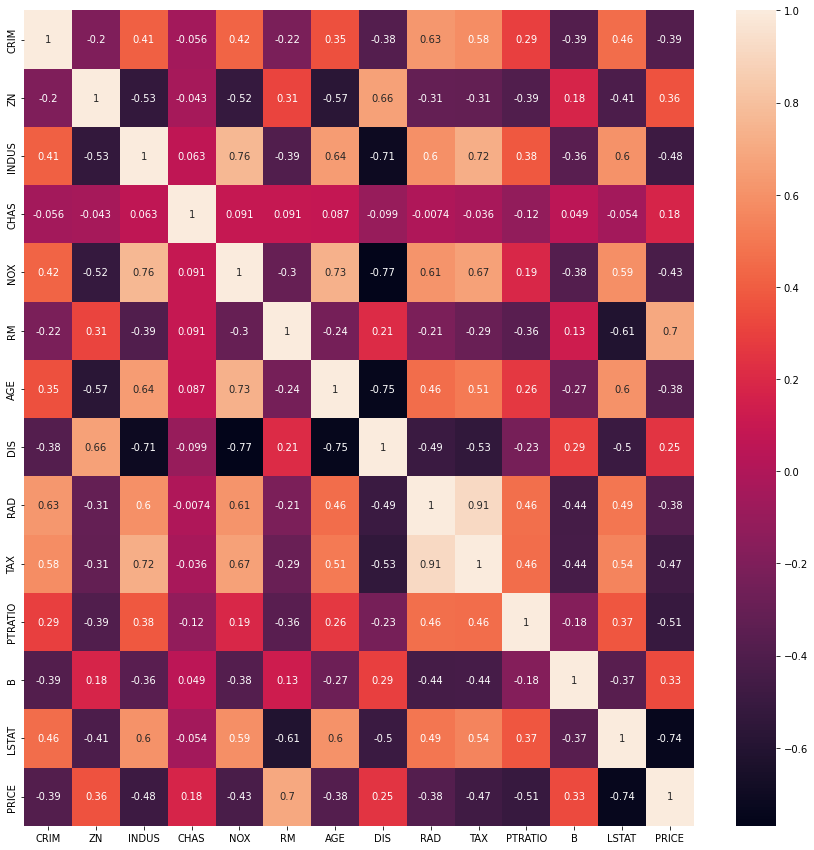

In [55]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(data.corr(), annot= True)

In [26]:
# Datatype
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


# Distributions

Mean: 22.532806324110677
Median: 21.2
STD: 9.197104087379818


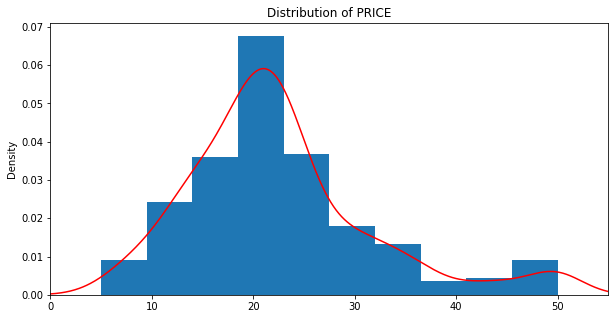

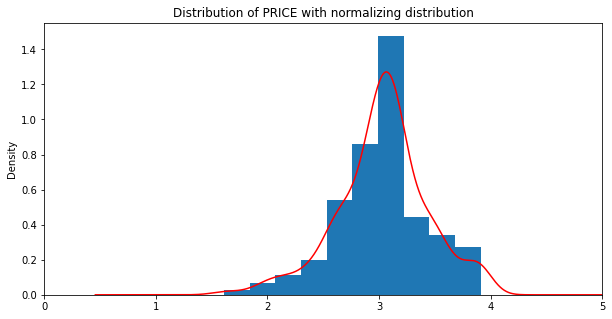

In [87]:
# Brief description of statistics [PRICE]
txt_price = f"""Mean: {data['PRICE'].mean()}
Median: {data['PRICE'].median()}
STD: {data['PRICE'].std()}"""

# Distribution of PRICE
print(txt_price)
fig, ax = plt.subplots(figsize = (10,5))
data['PRICE'].plot(kind = "hist", density = True)
data['PRICE'].plot(kind = "kde", color = 'red')
plt.xlim([0, 55])
plt.title('Distribution of PRICE')
plt.show()
fig, ax = plt.subplots(figsize = (10,5))
np.log(data['PRICE']).plot(kind = "hist", density = True)
np.log(data['PRICE']).plot(kind = "kde", color = 'red')
plt.xlim([0, 5])
plt.title('Distribution of PRICE with normalizing distribution')
plt.show()

Mean: 12.653063241106722
Median: 11.36
STD: 7.141061511348571


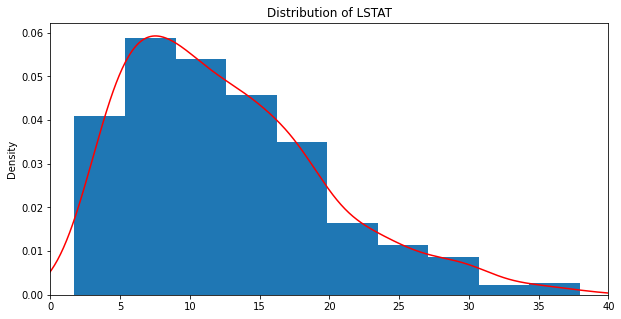

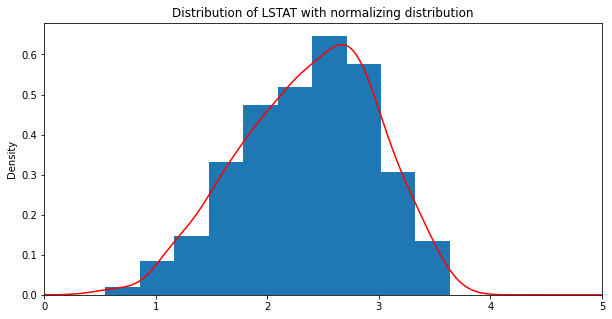

In [88]:
# Brief description of statistics [LSTAT]
txt_lstat = f"""Mean: {data['LSTAT'].mean()}
Median: {data['LSTAT'].median()}
STD: {data['LSTAT'].std()}"""

# Distribution of LSTAT
print(txt_lstat)
fig, ax = plt.subplots(figsize = (10,5))
data['LSTAT'].plot(kind = "hist", density = True)
data['LSTAT'].plot(kind = "kde", color = 'red')
plt.xlim([0, 40])
plt.title('Distribution of LSTAT')
plt.show()
fig, ax = plt.subplots(figsize = (10,5))
np.log(data['LSTAT']).plot(kind = "hist", density = True)
np.log(data['LSTAT']).plot(kind = "kde", color = 'red')
plt.xlim([0, 5])
plt.title('Distribution of LSTAT with normalizing distribution')
plt.show()

Mean: 6.284634387351779
Median: 6.2085
STD: 0.7026171434153233


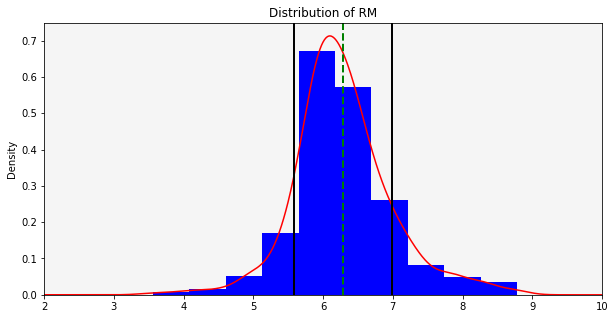

In [92]:
# Brief description of statistics [RM]
txt_rm = f"""Mean: {data['RM'].mean()}
Median: {data['RM'].median()}
STD: {data['RM'].std()}"""

# Distribution of ROOM
print(txt_rm)
fig, ax = plt.subplots(figsize = (10,5))
ax.patch.set_facecolor('whitesmoke')
data['RM'].plot(kind = "hist", color = 'blue', density = True)
data['RM'].plot(kind = "kde", color = 'red')
plt.axvline(data['RM'].mean(), color='green', linestyle='dashed', linewidth=2)
plt.axvline(data['RM'].mean()+data['RM'].std(), color='black',  linewidth=2)
plt.axvline(data['RM'].mean()-data['RM'].std(), color='black',  linewidth=2)
plt.xlim([2, 10])
plt.title('Distribution of RM')
plt.show()

Mean: 6.284634387351779
Median: 6.2085
STD: 0.7026171434153233


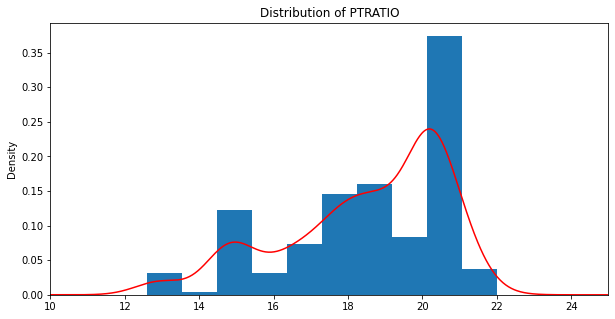

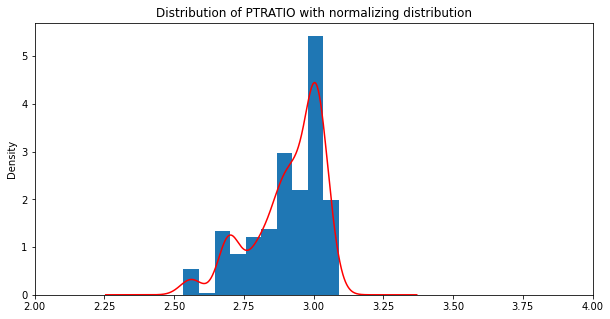

In [94]:
# Brief description of statistics [PTRATIO]
txt_ptratio = f"""Mean: {data['PTRATIO'].mean()}
Median: {data['PTRATIO'].median()}
STD: {data['PTRATIO'].std()}"""

# Distribution of STATUS
print(txt_rm)
fig, ax = plt.subplots(figsize = (10,5))
data['PTRATIO'].plot(kind = "hist", density = True)
data['PTRATIO'].plot(kind = "kde", color = 'red')
plt.xlim([10, 25])
plt.title('Distribution of PTRATIO')
plt.show()
fig, ax = plt.subplots(figsize = (10,5))
np.log(data['PTRATIO']).plot(kind = "hist", density = True)
np.log(data['PTRATIO']).plot(kind = "kde", color = 'red')
plt.xlim([2, 4])
plt.title('Distribution of PTRATIO with normalizing distribution')
plt.show()


# Graph of main features

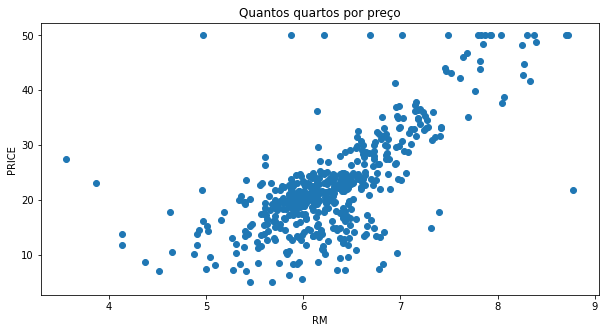

In [51]:
# Correlation POSITIVE [RM]
plt.figure(figsize=(10,5))
plt.scatter(data['RM'], data['PRICE'])
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.title('Quantos quartos por preço')
plt.show()

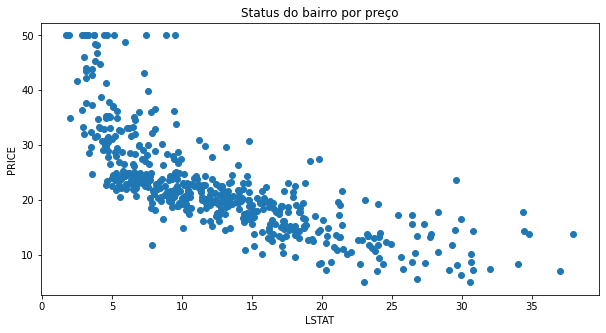

In [52]:
# Correlation NEGATIVE [LSTAT]
plt.figure(figsize=(10,5))
plt.scatter(data['LSTAT'], data['PRICE'])
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.title('Status do bairro por preço')
plt.show()

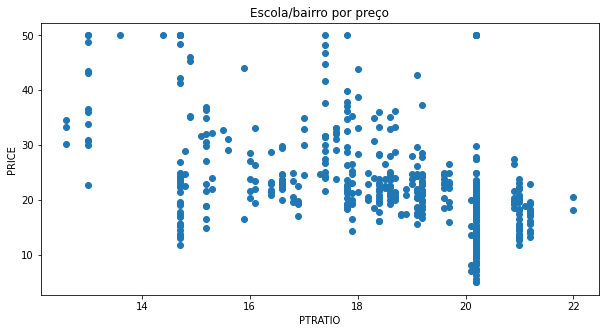

In [56]:
# Correlation NEGATIVE [PTRATIO]
plt.figure(figsize=(10,5))
plt.scatter(data['PTRATIO'], data['PRICE'])
plt.xlabel('PTRATIO')
plt.ylabel('PRICE')
plt.title('Escola/bairro por preço')
plt.show()

# RM predict simple linear regression

Shape of x_train:  (404, 1)
Shape of x_test:   (102, 1)

y = a.x + b
b:  -32.39552264560753
a:  [8.76050748]

R² train:  0.45019179593422387
R² test:   0.5877214395051774

Mean:    6.284634387351779
Median:  6.2085
STD:     0.7026171434153233


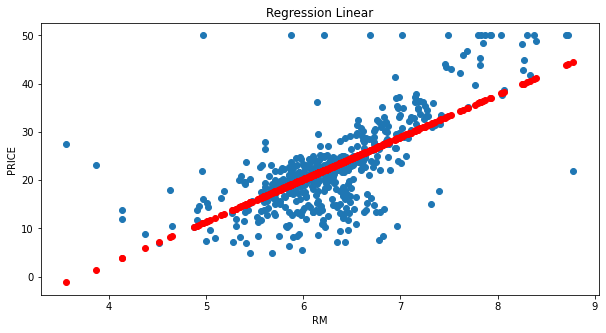

In [74]:
x = data['RM'].values
y = data['PRICE']
x = x.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =1)
print('Shape of x_train: ', x_train.shape)
print('Shape of x_test:  ', x_test.shape)
print()

regression = LinearRegression()
regression.fit(x_train, y_train)
print('y = a.x + b')
print('b: ', regression.intercept_)
print('a: ', regression.coef_)

print()
print('R² train: ', regression.score(x_train, y_train))
print('R² test:  ', regression.score(x_test, y_test))

print()
print('Mean:   ', data['RM'].mean())
print('Median: ', data['RM'].median())
print('STD:    ', data['RM'].std())

plt.figure(figsize=(10,5))
plt.scatter(x, y)
plt.plot(x, regression.predict(x), 'o', color = 'red')
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.title('Regression Linear')
plt.show()

# LSTAT predict simple linear regression

Shape of x_train:  (404, 1)
Shape of x_test:   (102, 1)

y = a.x + b
b:  34.334978390668674
a:  [-0.92441715]

R² train:  0.5495280791456811
R² test:   0.5244757432765152

Mean:    12.653063241106722
Median:  11.36
STD:     7.141061511348571


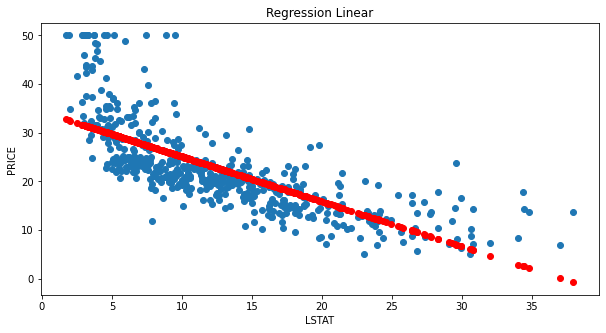

In [75]:
x = data['LSTAT'].values
y = data['PRICE']
x = x.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =1)
print('Shape of x_train: ', x_train.shape)
print('Shape of x_test:  ', x_test.shape)
print()

regression = LinearRegression()
regression.fit(x_train, y_train)
print('y = a.x + b')
print('b: ', regression.intercept_)
print('a: ', regression.coef_)

print()
print('R² train: ', regression.score(x_train, y_train))
print('R² test:  ', regression.score(x_test, y_test))

print()
print('Mean:   ', data['LSTAT'].mean())
print('Median: ', data['LSTAT'].median())
print('STD:    ', data['LSTAT'].std())

plt.figure(figsize=(10,5))
plt.scatter(x, y)
plt.plot(x, regression.predict(x), 'o', color = 'red')
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.title('Regression Linear')
plt.show()

# PTRATIO predict  simple linear regression

Shape of x_train:  (404, 1)
Shape of x_test:   (102, 1)

y = a.x + b
b:  62.665921573720496
a:  [-2.17715088]

R² train:  0.27548390626639585
R² test:   0.20052548714537932

Mean:    18.455533596837945
Median:  19.05
STD:     2.1649455237144406


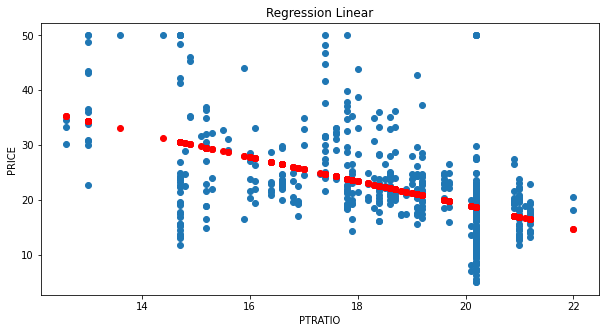

In [76]:
x = data['PTRATIO'].values
y = data['PRICE']
x = x.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =1)
print('Shape of x_train: ', x_train.shape)
print('Shape of x_test:  ', x_test.shape)
print()

regression = LinearRegression()
regression.fit(x_train, y_train)
print('y = a.x + b')
print('b: ', regression.intercept_)
print('a: ', regression.coef_)

print()
print('R² train: ', regression.score(x_train, y_train))
print('R² test:  ', regression.score(x_test, y_test))

print()
print('Mean:   ', data['PTRATIO'].mean())
print('Median: ', data['PTRATIO'].median())
print('STD:    ', data['PTRATIO'].std())
plt.figure(figsize=(10,5))
plt.scatter(x, y)
plt.plot(x, regression.predict(x), 'o', color = 'red')
plt.xlabel('PTRATIO')
plt.ylabel('PRICE')
plt.title('Regression Linear')
plt.show()